<a href="https://colab.research.google.com/github/KacperWalczak/digital_image_processing/blob/main/Digital_image_processing_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
from zipfile import ZipFile
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import svm
from sklearn import metrics

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# Wczytanie bazy obrazów
def readCPOdataset(datasetPath):
  # with ZipFile(datasetPath, 'r') as zip:
  #   zip.extractall()
  folder = os.path.dirname(datasetPath)
  print(folder)
  trainImg = [os.path.join(folder + '/train_img', f) for f in os.listdir(folder + '/train_img') if os.path.isfile(os.path.join(folder + '/train_img', f))]
  testImg = [os.path.join(folder + '/test_img', f) for f in os.listdir(folder + '/test_img') if os.path.isfile(os.path.join(folder + '/test_img', f))]
  trainImg.sort()
  testImg.sort()

  def readLabelFile(path):
    labels = []
    with open(path,'r') as f:
      labels = f.readlines()
      labels = [int(x.rstrip('\n')) for x in labels]
    return labels
  trainLabels = readLabelFile(folder + '/train.txt')
  testLabels = readLabelFile(folder + '/test.txt')

  return trainImg, testImg, trainLabels, testLabels

trainImg, testImg, trainLabels, testLabels = readCPOdataset('/content/drive/MyDrive/lab5/dataset.zip')
print(f"Ścieżki do danych uczących: {trainImg}\nŚcieżki do danych walidacyjnych: {testImg}")
print(f"Etykiety danych uczących: {trainLabels}\nEtykiety danych walidacyjnych: {testLabels}")

/content/drive/MyDrive/lab5
Ścieżki do danych uczących: ['/content/drive/MyDrive/lab5/train_img/00.png', '/content/drive/MyDrive/lab5/train_img/01.png', '/content/drive/MyDrive/lab5/train_img/02.png', '/content/drive/MyDrive/lab5/train_img/03.png', '/content/drive/MyDrive/lab5/train_img/04.png', '/content/drive/MyDrive/lab5/train_img/05.png', '/content/drive/MyDrive/lab5/train_img/06.png', '/content/drive/MyDrive/lab5/train_img/07.png', '/content/drive/MyDrive/lab5/train_img/08.png', '/content/drive/MyDrive/lab5/train_img/09.png', '/content/drive/MyDrive/lab5/train_img/10.png', '/content/drive/MyDrive/lab5/train_img/11.png', '/content/drive/MyDrive/lab5/train_img/12.png', '/content/drive/MyDrive/lab5/train_img/13.png', '/content/drive/MyDrive/lab5/train_img/14.png', '/content/drive/MyDrive/lab5/train_img/15.png', '/content/drive/MyDrive/lab5/train_img/16.png', '/content/drive/MyDrive/lab5/train_img/17.png', '/content/drive/MyDrive/lab5/train_img/18.png', '/content/drive/MyDrive/lab5/tr

In [13]:
#wczytanie obrazow
def file_opening(list_of_file_paths, limit):
  images=[]
  iterator=0
  for path in list_of_file_paths:
    if iterator == limit:
      break
    images.append(cv2.imread(path, cv2.IMREAD_GRAYSCALE))
    iterator+=1
  return images
train_img = file_opening(trainImg,90)
test_img = file_opening(testImg,90)

In [14]:
#wstępne przetworzenie obrazów - zmiana rozdzielczości
img_standard_size = []
for im in train_img:
  img_standard_size.append(cv2.resize(im,(int(256),int(256))))

In [15]:
#Tworzenie obiektu metody HOG z zadanymi parametrami
hog = cv2.HOGDescriptor((256,256), (16,16), (8,8), (8,8), 9 )

In [21]:
#Wyznaczanie wektorów cech hog do treningu
hog_vectors = []
for im in img_standard_size:
    hog_vector = hog.compute(im)
    lc_hog = np.zeros(len(hog_vector))
    for i in range(len(hog_vector)):
        lc_hog[i] = hog_vector[i]
    hog_vectors.append(lc_hog)

In [18]:
# Stwórz obiekt klasyfikatora SVM
clf = svm.SVC(kernel='linear') # Linear Kernel

In [22]:
#Rozpocznij trening klasyfikatora
clf.fit(hog_vectors, trainLabels)

SVC(kernel='linear')

In [ ]:
##########TEST############

In [23]:
img_standard_size_test = []
for im in test_img:
  img_standard_size_test.append(cv2.resize(im,(int(256),int(256))))

In [25]:
#wyznaczanie wektorow hog do testu
hog_vectors_test = []
for im in img_standard_size_test:
    hog_vector = hog.compute(im)
    lc_hog = np.zeros(len(hog_vector))
    for i in range(len(hog_vector)):
        lc_hog[i] = hog_vector[i]
    hog_vectors_test.append(lc_hog)

In [26]:
#predykcja
y_pred_test = clf.predict(hog_vectors_test)
y_pred_train = clf.predict(hog_vectors)

In [27]:
print(y_pred_test)
print(testLabels)

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]


In [28]:
#sprawdzenie skutecznosci dla testu
score = 0
for i in range(len(y_pred_test)):
  if y_pred_test[i] == testLabels[i]:
    score += 1
acc = score / len(y_pred_test) *100
print(f"Skutecznosc klasyfikatora dal testu wynosi {acc} %")

Skutecznosc klasyfikatora dal testu wynosi 80.0 %


In [29]:
#sprawdzenie skutecznosci dla treningu
score = 0
for i in range(len(y_pred_train)):
  if y_pred_train[i] == trainLabels[i]:
    score += 1
acc = score / len(y_pred_train) *100
print(f"Skutecznosc klasyfikatora dla treningu wynosi {acc} %")

Skutecznosc klasyfikatora dla treningu wynosi 100.0 %


In [ ]:
###################zadanie drugie########################################

In [30]:
#binaryzacja
def binaryzacja(images):
  img_bin = []
  for img in images:
    img_bin.append(cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,5,2))
  return img_bin

In [31]:
#zamkniecie
def zamkniecie(images):
  img_op = []
  kernel = np.ones((5,5),np.uint8)
  for img in images:
    img_op.append(cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel))
  return img_op

In [32]:
#erozja
def erozja(images):
  img_ero = []
  kernel = np.ones((5,5),np.uint8)
  for img in images:
    img_ero.append(cv2.erode(img, kernel, iterations = 2))
  return img_ero

In [33]:
#detekcja krawedzi
def detekcja_krawedzi(images):
  img_edg = []
  for image in images:
    #img_edg.append(cv2.Laplacian(image, cv2.CV_64F))
    img_edg.append(cv2.Canny(image,120,255))
  return img_edg

In [34]:
def image_printing(images, n):
  for i in range(n):
    plt.imshow(images[i])
    plt.show()

In [35]:
#dylatacja
def dylatacja(images):
  img_dil = []
  kernel = np.ones((5,5),np.uint8)
  for img in images:
    img_dil.append(cv2.dilate(img, kernel, iterations = 1))
  return img_dil

In [36]:
#otwarcie
def otwarcie(images):
  img_op = []
  kernel = np.ones((5,5),np.uint8)
  for img in images:
    img_op.append(cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel))
  return img_op

In [37]:
#filtr gausa
def gaus(images):
  imgs = []
  for image in images:
    imgs.append(cv2.GaussianBlur(image,(9,9),0.9))
  return imgs

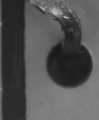

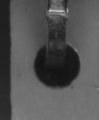

In [53]:
imgs = []
for im in train_img:
  imgs.append(im[370:490,99:400])
#image_printing(imgs,9)

imgs2 = []
for im in imgs:
  a = im[:,int(im.shape[1]):int(im.shape[1]*0.33)]
  b= im[:, int(im.shape[1]*0.33):int(im.shape[1]*0.66)]
  c = im[:, int(im.shape[1]*0.66):int(im.shape[1]*0.99)]
  d =[a,b,c]
  imgs2.append(d)
print()
# cv2_imshow(imgs2[0][0])
cv2_imshow(imgs2[0][2])
cv2_imshow(imgs2[0][1])

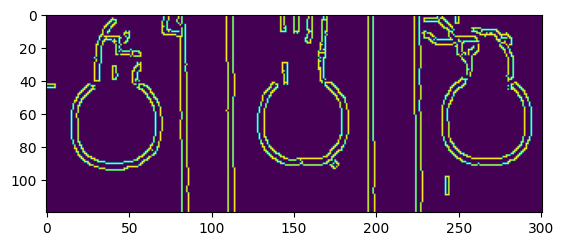

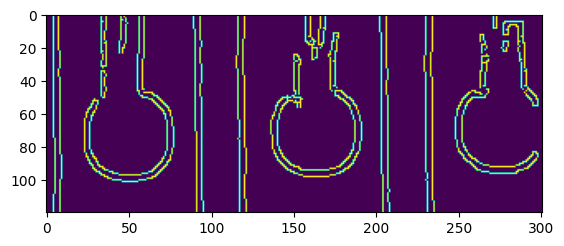

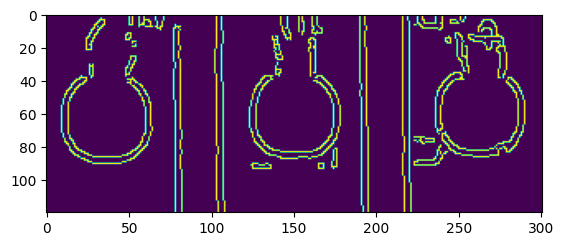

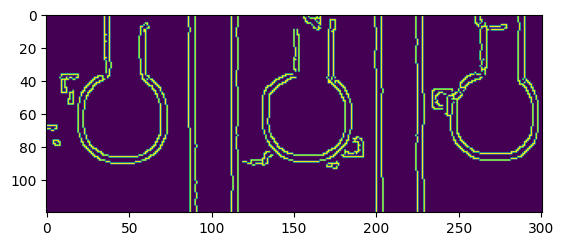

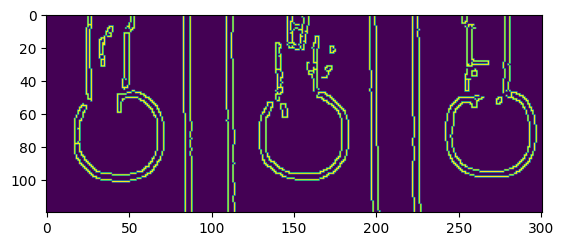

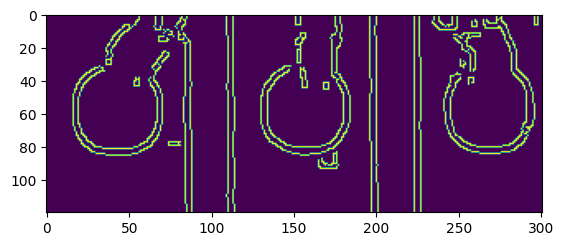

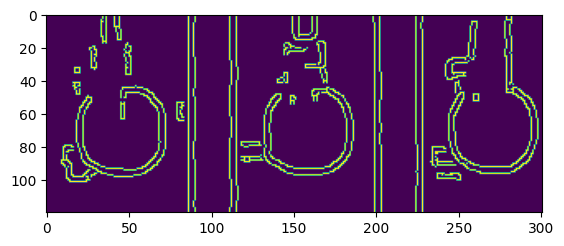

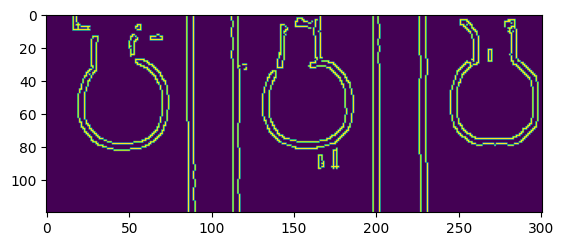

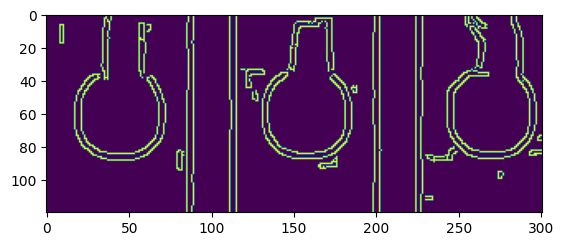

In [86]:
imgs = []
for im in train_img:
  imgs.append(im[370:490,99:400])
#image_printing(imgs,9)
images2 = []
for im in imgs:
  images2.append(im)
imgs = gaus(imgs)
imgs = erozja(imgs)
imgs = otwarcie(imgs)
imgs = binaryzacja(imgs)

imgs = gaus(imgs)
imgs = gaus(imgs)
imgs_edges = detekcja_krawedzi(imgs)

image_printing(imgs_edges,9)

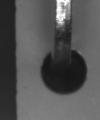

In [87]:
images = []
for im in images2:
  a= im[:, im.shape[0]:im.shape[1]]
  b= im[:, 100:200]
  c = im[:, 200:300]
  d =[a,b,c]
  images.append(d)

cv2_imshow(images[1][1])